# Visualizing the distribution of a dataset
https://seaborn.pydata.org/tutorial/distributions.html

In [1]:
%pylab inline  
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from scipy import stats, integrate

In [3]:
import seaborn as sns
sns.set(color_codes=True)

## Plotting univariate distributions

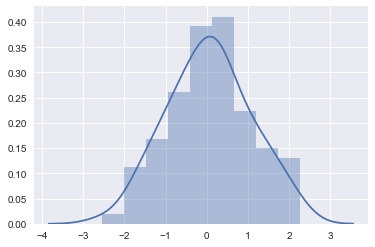

In [4]:
x = np.random.normal(size=100)
sns.distplot(x);

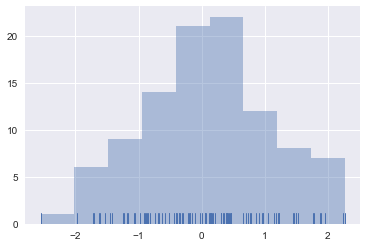

In [5]:
sns.distplot(x, kde=False, rug=True);

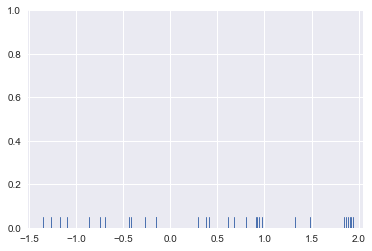

In [14]:
sns.rugplot(x);

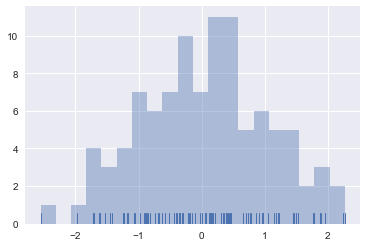

In [6]:
sns.distplot(x, bins=20, kde=False, rug=True);

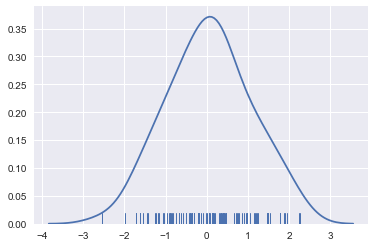

In [7]:
sns.distplot(x, hist=False, rug=True);

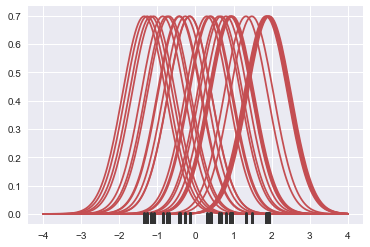

In [8]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

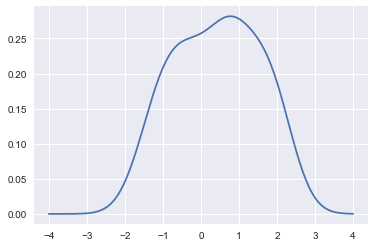

In [9]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

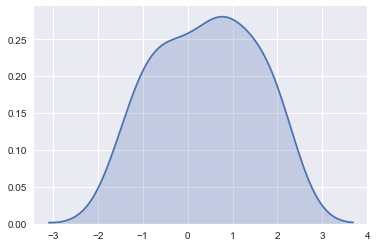

In [11]:
sns.kdeplot(x, shade=True);

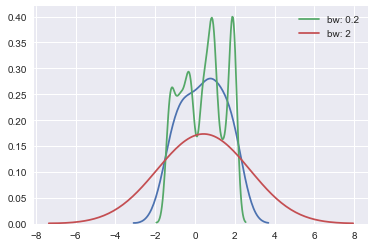

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

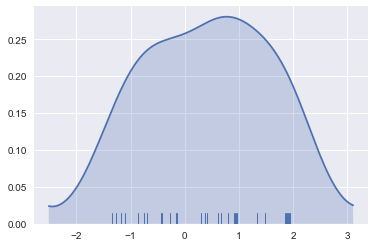

In [18]:
sns.kdeplot(x, shade=True, cut=2)
sns.rugplot(x);

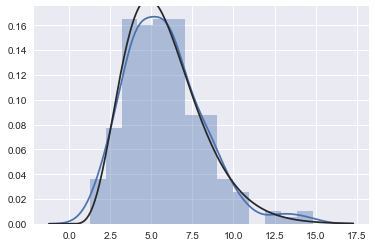

In [20]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma);

## Plotting bivariate distributions

In [23]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.tail()

,x,y
195,-0.321713,1.389101
196,-1.400655,1.578662
197,0.442883,1.676360
198,-1.203621,-0.505514
199,0.874444,2.099180


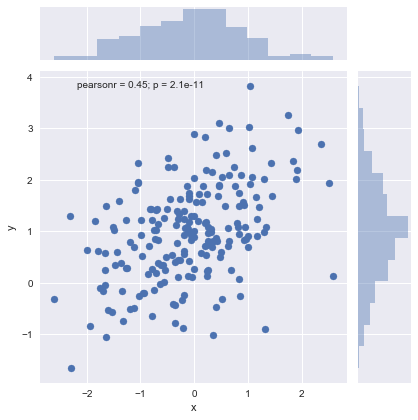

In [24]:
sns.jointplot(x="x", y="y", data=df);

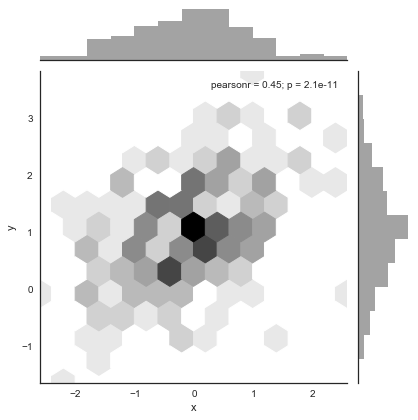

In [26]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=df, kind="hex", color="k");

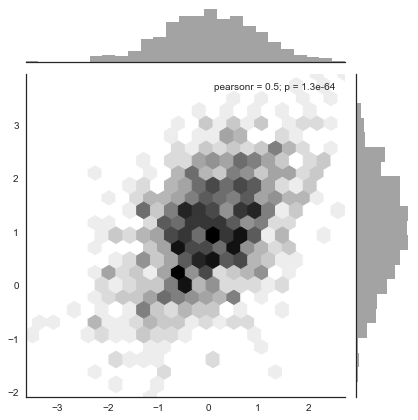

In [25]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

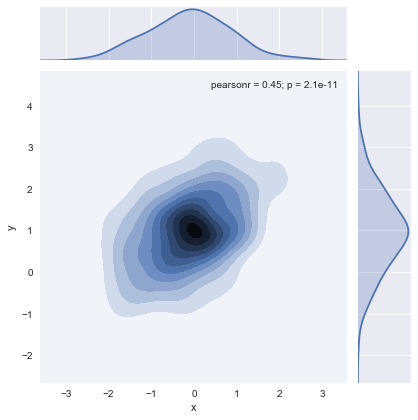

In [27]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

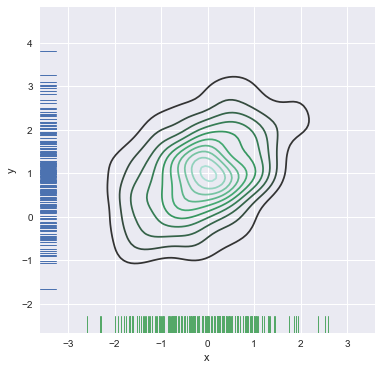

In [28]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

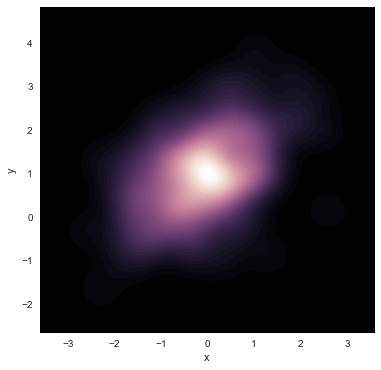

In [29]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

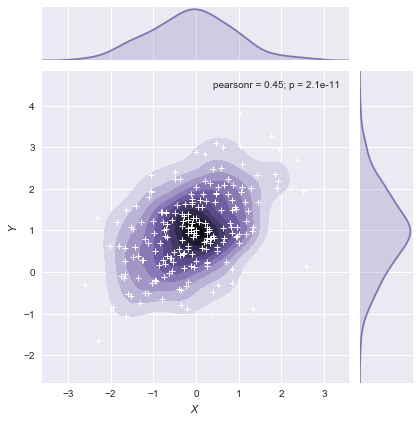

In [30]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

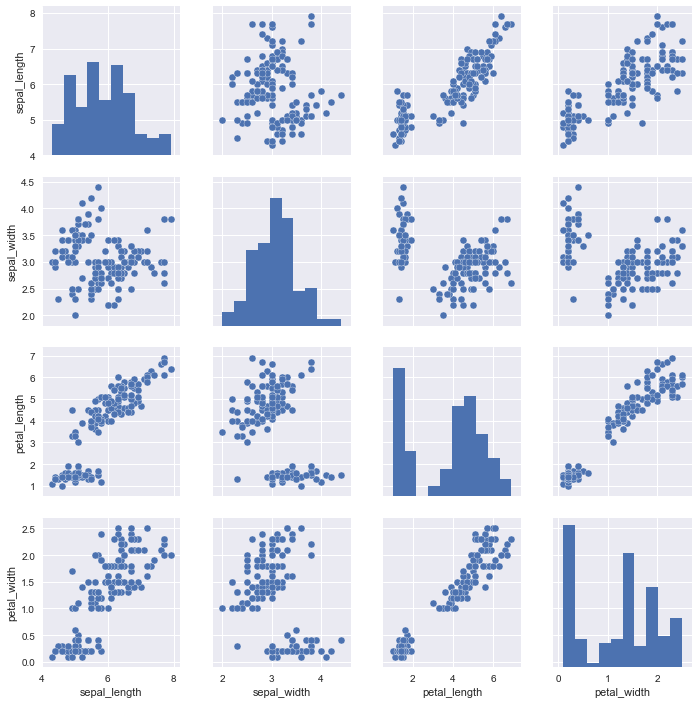

In [31]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

## Visualizing pairwise relationships in a dataset

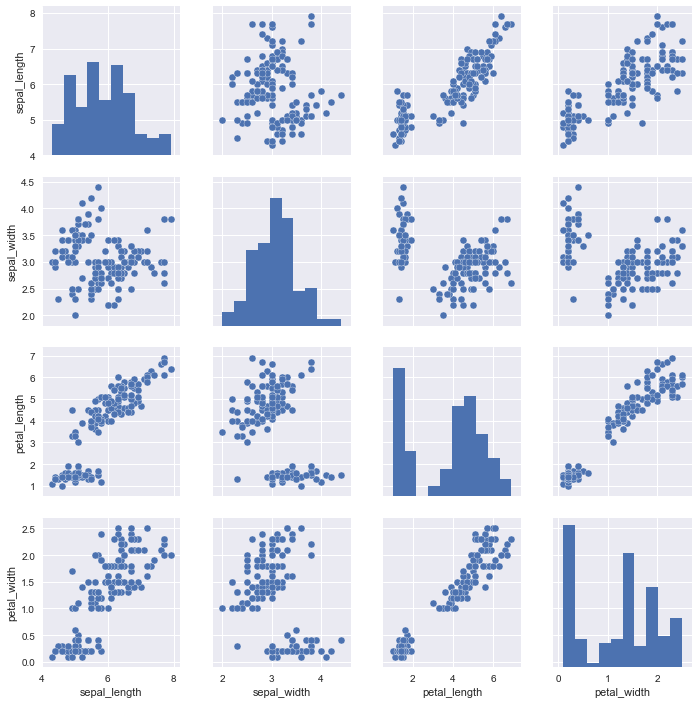

In [32]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Softwares\Python\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


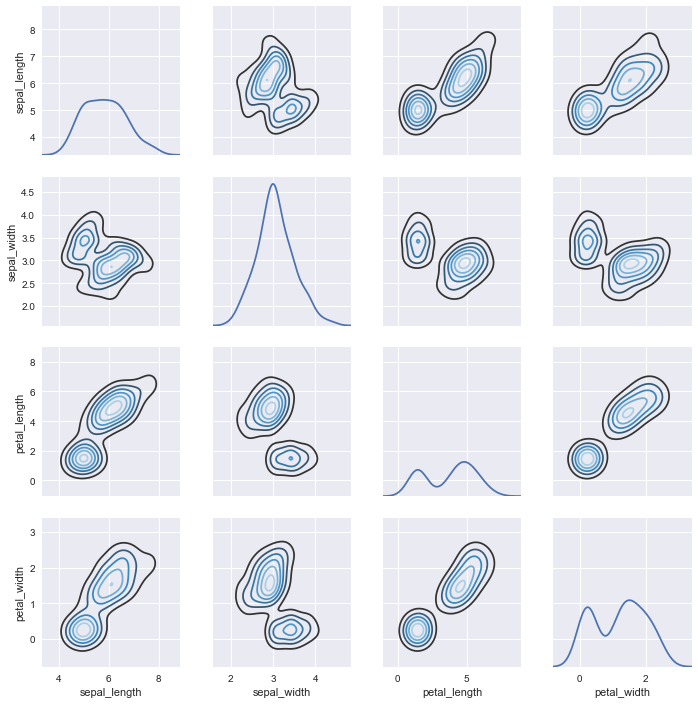

In [35]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);